# MTCNN and required packages

In [9]:
#! pip install mtcnn
from mtcnn import MTCNN
import cv2
import imageio
import matplotlib.pyplot as plt
import matplotlib
from PIL import Image
import sys
import os
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN
import imageio
import glob
import numpy as np


In [10]:

# This is the path where you want to search
path = 'dataset/manipulated_sequences/FaceSwap/c23/videos/data'

# this is the extension you want to detect
extension = '.jpg'


def get_list_filenames(cwd, path, extension):
    try:
        os.chdir(path)
        print("Successfully change the directory!")
        filenames = glob.glob('*.{}'.format(extension))
        print("Number of files: ", len(filenames))

    # Caching the exception
    except:
        print("Something wrong with specified directory. Exception- ", sys.exc_info())

    # handling with finally: restore the path which is the current directory before changing directory
    finally:
        print("Restoring the path")
        os.chdir(cwd)  # Change it back to cwd (original directory)
        print("Current directory is-", os.getcwd())

    return filenames


# Get a list of dataframe after reading all csv files given a path
def get_all_image_files_read(path, filenames):
    list_img = []
    for file in filenames:
        img = imageio.imread(path+file)
        list_img.append(img)
    return list_img


# Deepfake Videos Facial Extractions

In [11]:
%cd D:\toochi\\Video_Classifier\\code\dataset\\manipulated_sequences\\FaceSwap\\c23\\videos\\data

# initial directory
cwd = os.getcwd()
path_org = './'  # the directory where all the output result are located.
extension = 'jpg'

filename = get_list_filenames(cwd, path_org, extension)
print(filename[6999])


D:\toochi\Video_Classifier\code\dataset\manipulated_sequences\FaceSwap\c23\videos\data
Successfully change the directory!
Number of files:  7000
Restoring the path
Current directory is- D:\toochi\Video_Classifier\code\dataset\manipulated_sequences\FaceSwap\c23\videos\data
FaceSwap_video9_7.jpg


In [12]:
print(filename[3393])
print(len(filename))


FaceSwap_video536_6.jpg
7000


In [13]:
def extract_face(filename, required_size=(320, 320)):
    errCount = 0
    for i in range(len(filename)):
        # load image from file
        pixels = imageio.imread(filename[i])
        try:
            # creating a folder faces
            if not os.path.exists('Faceswap_facial_extractions'):
                os.makedirs('FaceSwap_facial_extractions')
        # if not created then raise error
        except OSError:
            print('Error: Creating directory ')

        # create the detector, using default weights
        detector = MTCNN()
        # detect faces in the image
        results = detector.detect_faces(pixels)
        # make sure the captured probability > 0.9 and 4 values in box.keys()
        if results:
            if results[0]['confidence'] >= 0.9 and len(results[0]['box']) == 4:
                # extract the bounding box from the first face
                x1, y1, width, height = results[0]['box']
                x2, y2 = x1 + width, y1 + height
                # extract the face
                print("The confidence is " + str(results[0]['confidence']))
                face = pixels[y1:y2, x1:x2]
                # resize pixels to the model size
                image = Image.fromarray(face)
                image = image.resize(required_size)
                # return face_array
                face_array = np.asarray(image)
                name = './FaceSwap_facial_extractions/image' + "_" + str(i) + '.jpg'
                # writing the extracted images
                imageio.imwrite(name, face_array)
                # print(str(i) + "/" + str(len(filename)) + "iterations")
                print('creating...' + name)
            else:
                errCount += 1
                print("confidence < 0.9")
                continue
        else:
            errCount += 1
            print("The face cannot be captured")
            continue
    return errCount


In [14]:
extract_face(filename, required_size=(320, 320))


The confidence is 0.9999063014984131
creating..../FaceSwap_facial_extractions/image_0.jpg
The confidence is 0.9999912977218628
creating..../FaceSwap_facial_extractions/image_1.jpg
The confidence is 0.9999256134033203
creating..../FaceSwap_facial_extractions/image_2.jpg
The confidence is 0.9998264908790588
creating..../FaceSwap_facial_extractions/image_3.jpg
The confidence is 0.9993575215339661
creating..../FaceSwap_facial_extractions/image_4.jpg
The confidence is 0.9978362917900085
creating..../FaceSwap_facial_extractions/image_5.jpg
The confidence is 0.998943030834198
creating..../FaceSwap_facial_extractions/image_6.jpg
The confidence is 0.9999794960021973
creating..../FaceSwap_facial_extractions/image_7.jpg
The confidence is 0.9999825954437256
creating..../FaceSwap_facial_extractions/image_8.jpg
The confidence is 0.9999891519546509
creating..../FaceSwap_facial_extractions/image_9.jpg
The confidence is 0.9997677206993103
creating..../FaceSwap_facial_extractions/image_10.jpg
The confid

1

In [26]:
err_images = 1
print("MTCNN model cannot capture {} images in the FaceSwap set".format(err_images))
capture_rate = (1 - (err_images/len(filename)))*100
print("The Capture Rate of FaceSwap is " + str(round(capture_rate, 2)) + "%")


MTCNN model cannot capture 1 images in the FaceSwap set
The Capture Rate of FaceSwap is 99.99%


# Real Videos Facial Extractions

In [16]:
# %cd ./dataset/original_sequences/youtube/c23/videos/data
%cd D:\toochi\\Video_Classifier\\code\dataset\\manipulated_sequences\\NeuralTextures\\c23\\videos\\data

# initial directory
cwd = os.getcwd()
path_org = './'  # the directory where all the output result are located.
extension = 'jpg'

filename = get_list_filenames(cwd, path_org, extension)
print(filename[6999])


D:\toochi\Video_Classifier\code\dataset\manipulated_sequences\NeuralTextures\c23\videos\data
Successfully change the directory!
Number of files:  7000
Restoring the path
Current directory is- D:\toochi\Video_Classifier\code\dataset\manipulated_sequences\NeuralTextures\c23\videos\data
neural_video9_7.jpg


In [17]:
print(filename[333])
print(len(filename))


neural_video142_5.jpg
7000


In [18]:

def extract_face(filename, required_size=(320, 320)):
    errCount = 0
    for i in range(len(filename)):
        # load image from file
        pixels = imageio.imread(filename[i])
        try:
            # creating a folder faces
            if not os.path.exists('Neural_facial_extractions'):
                os.makedirs('Neural_facial_extractions')
        # if not created then raise error
        except OSError:
            print('Error: Creating directory ')
        # create the detector, using default weights
        detector = MTCNN()
        # detect faces in the image
        results = detector.detect_faces(pixels)
        # make sure the captured probability > 0.9 and 4 values in box.keys()
        if results:
            if results[0]['confidence'] >= 0.9 and len(results[0]['box']) == 4:
                # extract the bounding box from the first face
                x1, y1, width, height = results[0]['box']
                x2, y2 = x1 + width, y1 + height
                # extract the face
                print("The confidence is " + str(results[0]['confidence']))
                face = pixels[y1:y2, x1:x2]
                # resize pixels to the model size
                image = Image.fromarray(face)
                image = image.resize(required_size)
                # return face_array
                face_array = np.asarray(image)
                name = './Neural_facial_extractions/image' + "_" + str(i) + '.jpg'
                # writing the extracted images
                imageio.imwrite(name, face_array)
                #print(str(i) + "/" + str(len(filename)) + "iterations")
                print('creating...' + name)
            else:
                errCount += 1
                print("confidence < 0.9")
                continue
        else:
            errCount += 1
            print("The face cannot be captured")
            continue
    return errCount


In [19]:
extract_face(filename, required_size=(320, 320))


The confidence is 0.9999434947967529
creating..../Neural_facial_extractions/image_0.jpg
The confidence is 0.9992140531539917
creating..../Neural_facial_extractions/image_1.jpg
The confidence is 0.9997302889823914
creating..../Neural_facial_extractions/image_2.jpg
The confidence is 0.9993724226951599
creating..../Neural_facial_extractions/image_3.jpg
The confidence is 0.9998220801353455
creating..../Neural_facial_extractions/image_4.jpg
The confidence is 0.9992634654045105
creating..../Neural_facial_extractions/image_5.jpg
The confidence is 0.9996823072433472
creating..../Neural_facial_extractions/image_6.jpg
The confidence is 0.999940037727356
creating..../Neural_facial_extractions/image_7.jpg
The confidence is 0.9999973773956299
creating..../Neural_facial_extractions/image_8.jpg
The confidence is 0.9999946355819702
creating..../Neural_facial_extractions/image_9.jpg
The confidence is 0.9996848106384277
creating..../Neural_facial_extractions/image_10.jpg
The confidence is 0.999244332313

0

In [24]:
err_images = 0
print("MTCNN model cannot capture {} images in the Real set".format(err_images))
capture_rate = (1 - (err_images/len(filename)))*100
print("The Capture Rate of NeuralTextures is " + str(round(capture_rate, 2)) + "%")


MTCNN model cannot capture 0 images in the Real set
The Capture Rate of NeuralTextures is 100.0%


In [21]:
#%cd ./dataset/original_sequences/youtube/c23/videos/data/Real_facial_extractions
%cd D:\toochi\\Video_Classifier\\code\dataset\\manipulated_sequences\\NeuralTextures\\c23\\videos\\data\\Neural_facial_extractions

# initial directory
cwd = os.getcwd()
path_org = './'  # the directory where all the output result are located.
extension = 'jpg'

filename = get_list_filenames(cwd, path_org, extension)
print(filename[699])


D:\toochi\Video_Classifier\code\dataset\manipulated_sequences\NeuralTextures\c23\videos\data\Neural_facial_extractions
Successfully change the directory!
Number of files:  7000
Restoring the path
Current directory is- D:\toochi\Video_Classifier\code\dataset\manipulated_sequences\NeuralTextures\c23\videos\data\Neural_facial_extractions
image_1627.jpg


In [22]:
import imageio
img = imageio.imread(filename[6606])
print(img.shape)
print(filename[6606])


(320, 320, 3)
image_6944.jpg


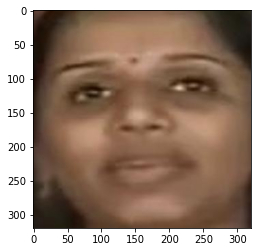

In [23]:
plt.imshow(img)
